[output]: [7] 0


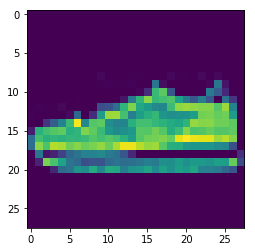

[output]: [5] 1


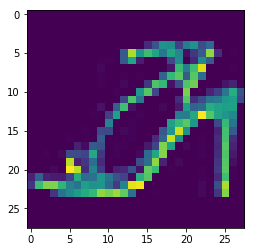

[output]: [2] 2


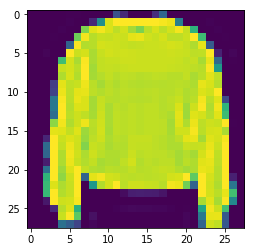

In [4]:
import tensorflow as tf
import skimage.io as io
import matplotlib.pyplot as plt
from math import *
import mnist_reader

X_test, y_test = mnist_reader.load_mnist('../../data/fashion', kind='t10k')
X_train, y_train = mnist_reader.load_mnist('../../data/fashion', kind='train')

HEIGHT = 28
WIDTH = 28

filename_queue = tf.train.string_input_producer(['fashion_mnist.tfrecords'])
reader = tf.TFRecordReader()

_, example = reader.read(filename_queue)
features = tf.parse_single_example(
    example,
    features={
        'label':tf.FixedLenFeature([], tf.int64),
        'image_raw':tf.FixedLenFeature([], tf.string)
    }
)
image = tf.decode_raw(features['image_raw'], tf.uint8) 
image = tf.reshape(image, [28, 28, 1])
label = tf.cast(features['label'], tf.int32)  

image_batch, label_batch = tf.train.shuffle_batch([image, label],  
                                                  batch_size=1,  
                                                  capacity=100,  
                                                  num_threads=2,
                                                  min_after_dequeue=50)  
image = tf.reshape(image_batch, (HEIGHT, WIDTH))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    c = 0

    img_label_list = []
    coordinateSet = []
    o_distance_list = []

    for i in range(3):
        img, label = sess.run([image, label_batch])
        print("[output]:",label,c)
        plt.imshow(img)
        plt.show()
        img_label_list.append((img, label))
        c += 1
    
    coord.request_stop()
    coord.join(threads)